In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')


In [5]:
# Step 2: Load the Data
# Load the dataset
url_ratings = 'ml-100k/u.data'
url_movies = 'ml-100k/u.item'

column_names_ratings = ['user_id', 'item_id', 'rating', 'timestamp']
column_names_movies = ['item_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 
                       'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 
                       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 
                       'Sci-Fi', 'Thriller', 'War', 'Western']

df_ratings = pd.read_csv(url_ratings, sep='\t', names=column_names_ratings)
df_movies = pd.read_csv(url_movies, sep='|', names=column_names_movies, encoding='latin-1')

# Merge the datasets on item_id
df = pd.merge(df_ratings, df_movies, on='item_id')


In [6]:
# Step 3: Understand the Data
# Display the first few rows
print(df.head())

# Get basic information
print(df.info())

# Summary statistics
print(df.describe())


   user_id  item_id  rating  timestamp         title release_date  \
0      196      242       3  881250949  Kolya (1996)  24-Jan-1997   
1       63      242       3  875747190  Kolya (1996)  24-Jan-1997   
2      226      242       5  883888671  Kolya (1996)  24-Jan-1997   
3      154      242       3  879138235  Kolya (1996)  24-Jan-1997   
4      306      242       5  876503793  Kolya (1996)  24-Jan-1997   

   video_release_date                                         IMDb_URL  \
0                 NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)   
1                 NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)   
2                 NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)   
3                 NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)   
4                 NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)   

   unknown  Action  ...  Fantasy  Film-Noir  Horror  Musical  Mystery  \
0        0       0  ...        0          0       0        0       

In [7]:
# Step 4: Handle Missing Data
# Check for missing values
print(df.isnull().sum())


user_id                    0
item_id                    0
rating                     0
timestamp                  0
title                      0
release_date               9
video_release_date    100000
IMDb_URL                  13
unknown                    0
Action                     0
Adventure                  0
Animation                  0
Children                   0
Comedy                     0
Crime                      0
Documentary                0
Drama                      0
Fantasy                    0
Film-Noir                  0
Horror                     0
Musical                    0
Mystery                    0
Romance                    0
Sci-Fi                     0
Thriller                   0
War                        0
Western                    0
dtype: int64


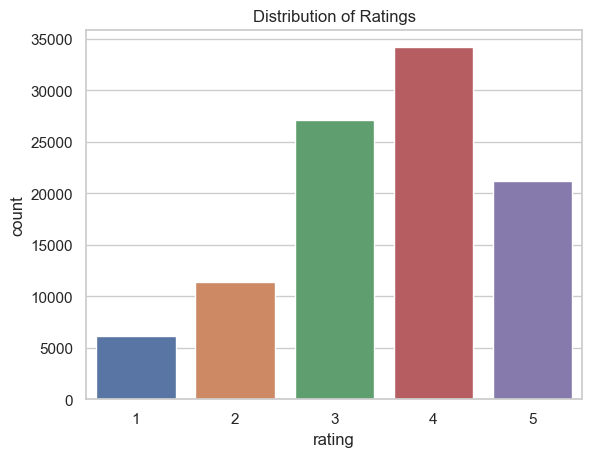

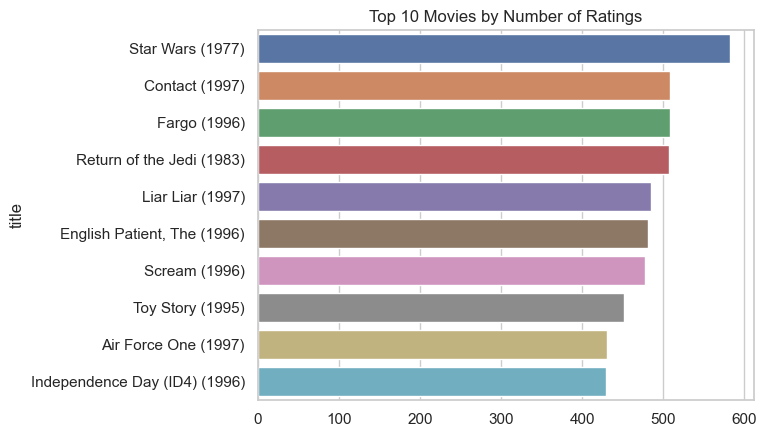

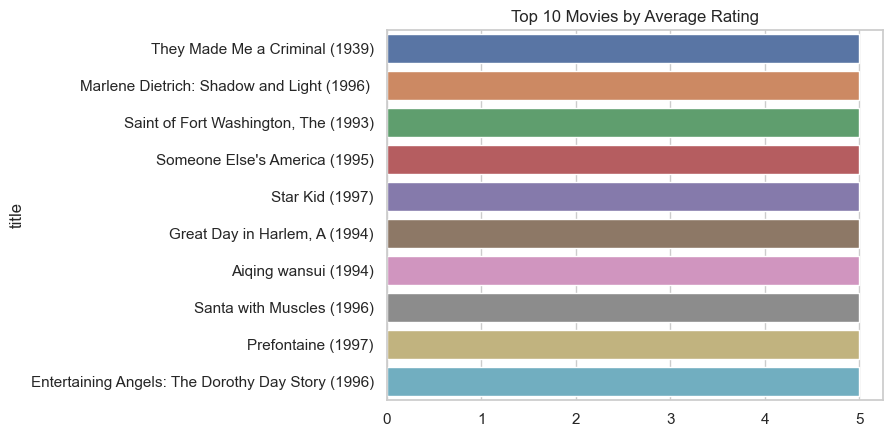

In [8]:
# Step 5: Data Visualization
# Distribution of Ratings
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.show()

# Number of Ratings per Movie
ratings_per_movie = df['title'].value_counts().head(10)
sns.barplot(y=ratings_per_movie.index, x=ratings_per_movie.values)
plt.title('Top 10 Movies by Number of Ratings')
plt.show()

# Average Rating per Movie
average_ratings = df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(y=average_ratings.index, x=average_ratings.values)
plt.title('Top 10 Movies by Average Rating')
plt.show()


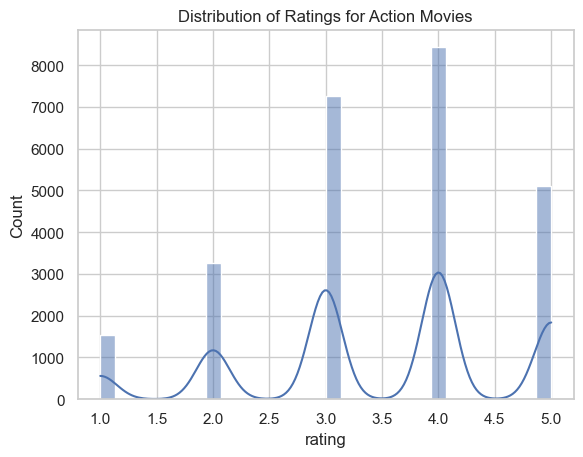

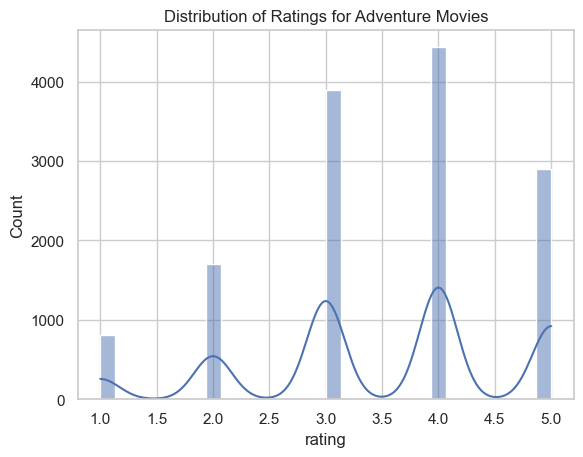

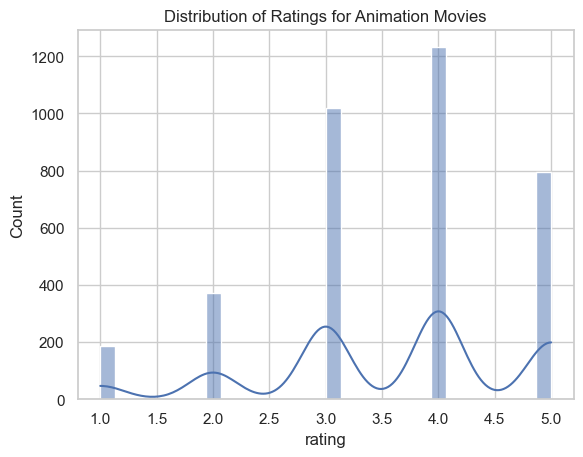

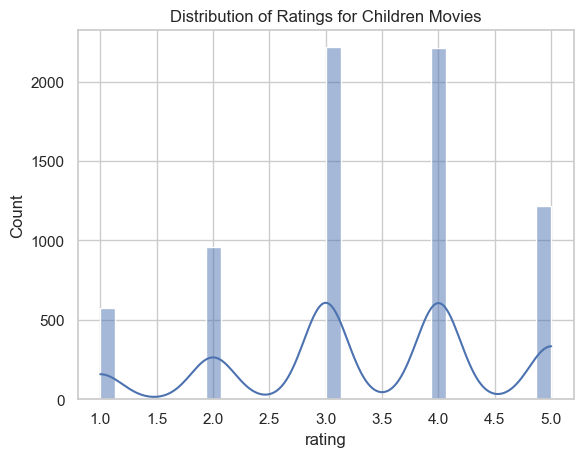

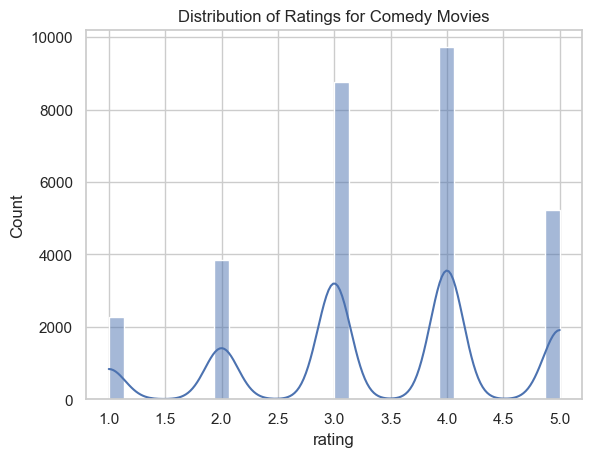

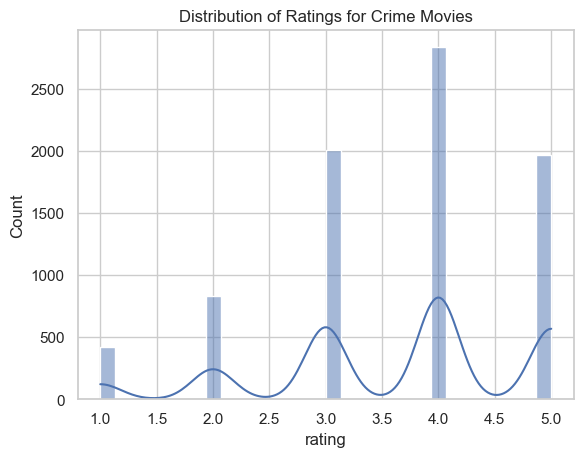

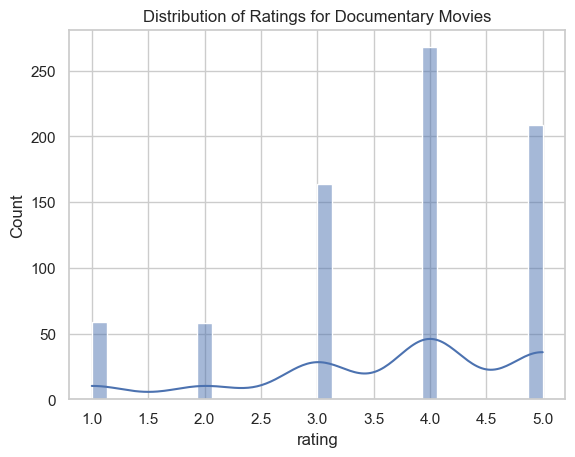

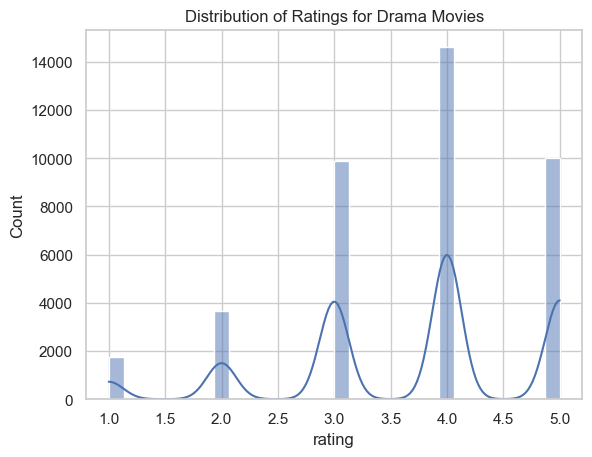

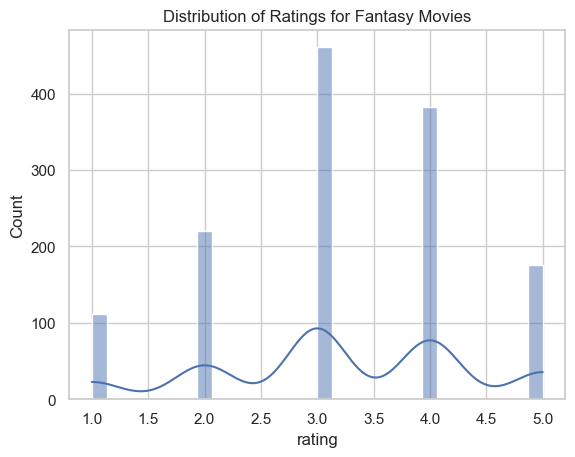

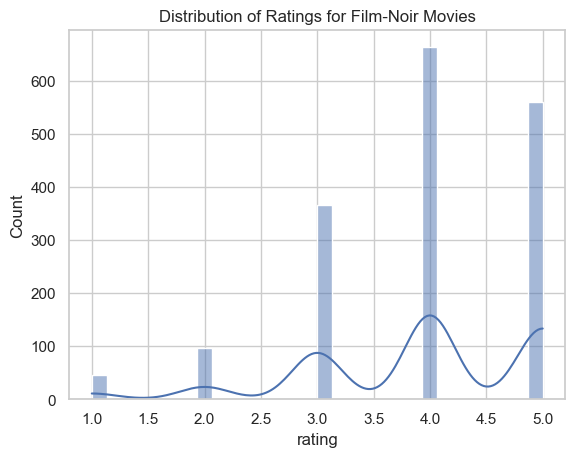

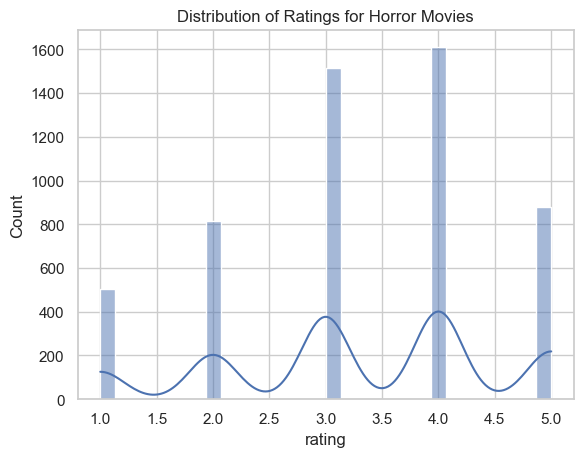

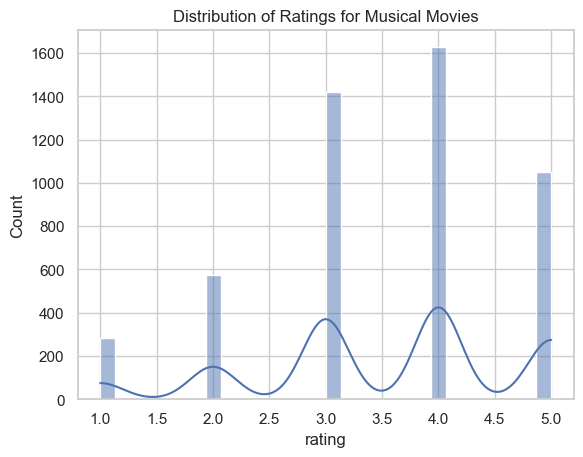

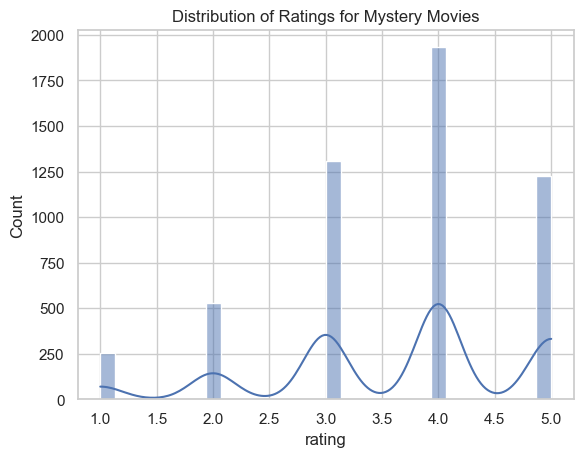

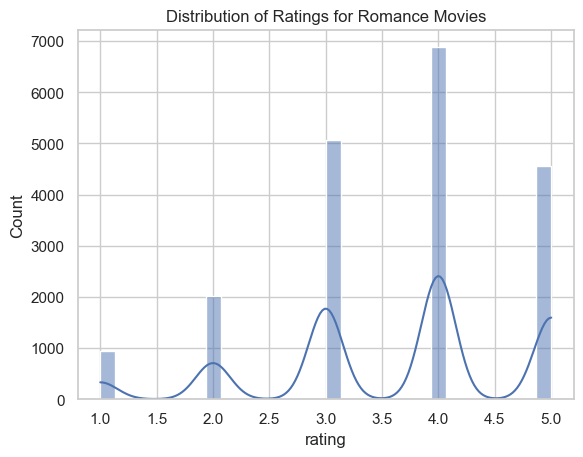

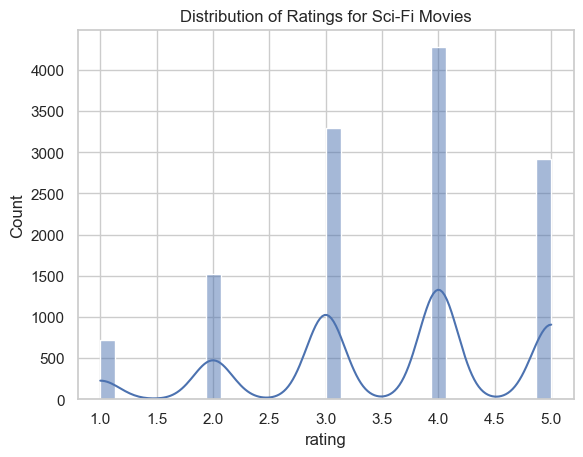

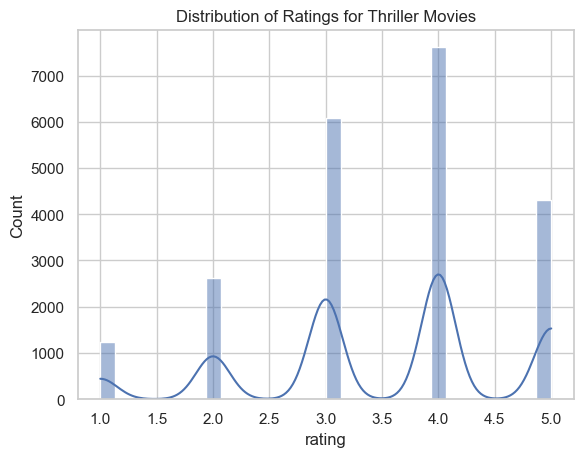

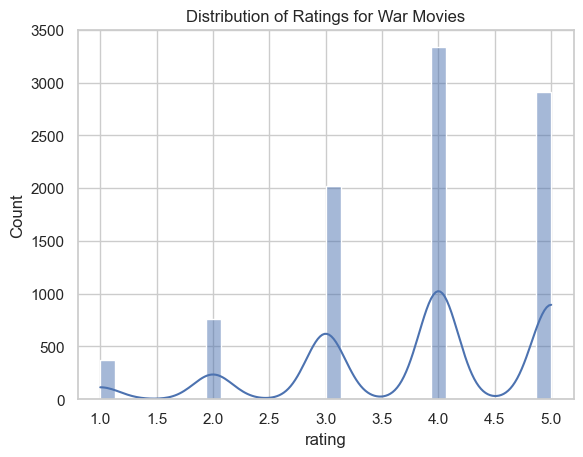

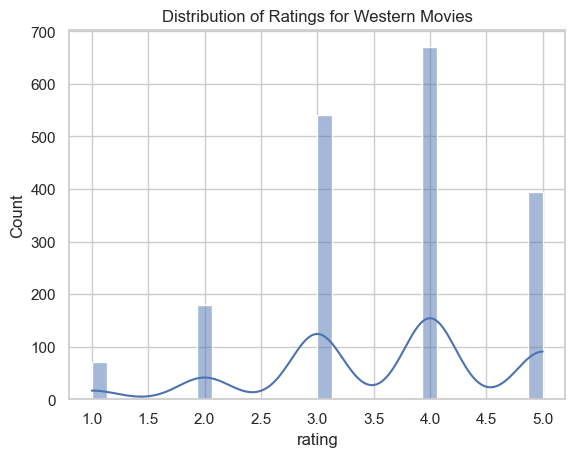

In [9]:
# Step 6: Univariate Analysis
# Distribution of ratings by genre
genres = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 
          'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 
          'Sci-Fi', 'Thriller', 'War', 'Western']

for genre in genres:
    genre_ratings = df[df[genre] == 1]['rating']
    sns.histplot(genre_ratings, kde=True, bins=30)
    plt.title(f'Distribution of Ratings for {genre} Movies')
    plt.show()


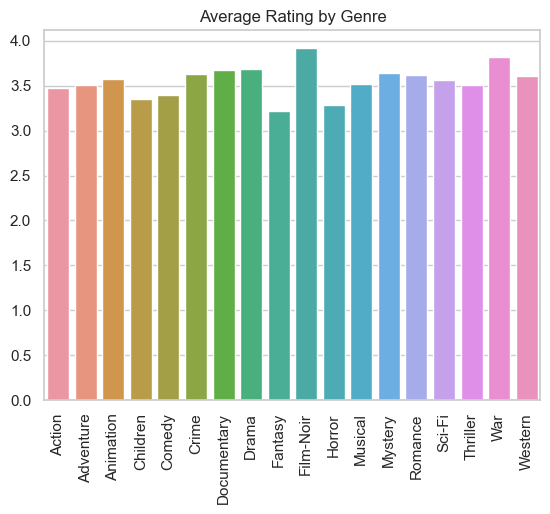

In [10]:
# Step 7: Bivariate Analysis
# Average rating by genre
average_rating_by_genre = {}
for genre in genres:
    average_rating_by_genre[genre] = df[df[genre] == 1]['rating'].mean()

sns.barplot(x=list(average_rating_by_genre.keys()), y=list(average_rating_by_genre.values()))
plt.xticks(rotation=90)
plt.title('Average Rating by Genre')
plt.show()


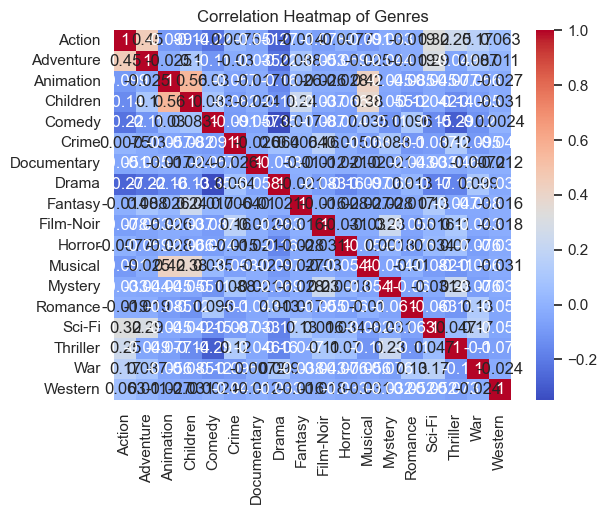

In [11]:
# Step 8: Multivariate Analysis
# Correlation heatmap of genres
genre_columns = df[genres]
correlation_matrix = genre_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Genres')
plt.show()


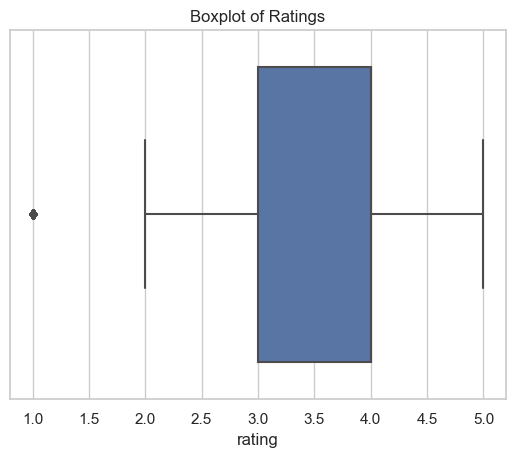

In [12]:
# Step 9: Identify and Handle Outliers
# Box plot to identify outliers in Ratings
sns.boxplot(x=df['rating'])
plt.title('Boxplot of Ratings')
plt.show()

# Removing outliers from Ratings (though ratings are discrete and have a fixed range)
df = df[(df['rating'] >= 1) & (df['rating'] <= 5)]


In [13]:
# Step 10: Feature Engineering
# Create additional features if needed
# For example, calculate the total number of ratings per movie
df['num_ratings'] = df.groupby('item_id')['rating'].transform('count')
df['avg_rating'] = df.groupby('item_id')['rating'].transform('mean')


In [14]:
# Step 11: Summary and Insights
# Summarize key findings
print("Key Insights:")

# Rating distribution
rating_dist = df['rating'].value_counts()
print(f"Rating Distribution:\n{rating_dist}")

# Top movies by number of ratings
top_movies_by_num_ratings = df['title'].value_counts().head(10)
print(f"Top 10 Movies by Number of Ratings:\n{top_movies_by_num_ratings}")

# Top movies by average rating
top_movies_by_avg_rating = df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
print(f"Top 10 Movies by Average Rating:\n{top_movies_by_avg_rating}")

# Insights from genre analysis
average_rating_per_genre = {}
for genre in genres:
    average_rating_per_genre[genre] = df[df[genre] == 1]['rating'].mean()
print(f"Average Rating by Genre:\n{average_rating_per_genre}")

print("The average rating per genre analysis indicates that certain genres tend to receive higher ratings.")


Key Insights:
Rating Distribution:
rating
4    34174
3    27145
5    21201
2    11370
1     6110
Name: count, dtype: int64
Top 10 Movies by Number of Ratings:
title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: count, dtype: int64
Top 10 Movies by Average Rating:
title
They Made Me a Criminal (1939)                       5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Saint of Fort Washington, The (1993)                 5.0
Someone Else's America (1995)                        5.0
Star Kid (1997)                                      5.0
Great Day in Harlem, A (1994)                        5.0
Aiqing wansui (1994)                                 5.0
S

Findings:
1. Rating Distribution: Understanding the distribution of ratings helps in identifying the general sentiment of the users.
2. Top Movies by Number of Ratings: Identifying the most popular movies helps in understanding user preferences.
3. Top Movies by Average Rating: Identifying highly-rated movies helps in understanding which movies are considered the best by users.
4. Average Rating by Genre: Analyzing the average rating by genre helps in understanding how different genres are perceived by the audience.